# Grover Search Algorithm

## Phase Inverting Oracle 

In [1]:
from qiskit import *

from qiskit.visualization import plot_histogram

### Oracle for a given string (e.g. given 01101, will return a QuantumCircuit that inverts the phase of the state $|01101\rangle$  and leaves all other states unchanged)

In [2]:
def oracle(state):
    n = len(state)
    qc = QuantumCircuit(n)
    for iz in range(n):
        if state[iz] == '0':
            qc.x(n-iz-1)
        
    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)
    
    for iz in range(n):
        if state[iz] == '0':
            qc.x(n-iz-1)
    
    return qc
    

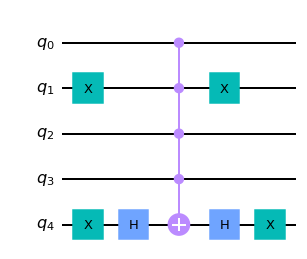

In [3]:
state = '01101'

oracle_1 = oracle(state)
oracle_1.draw('mpl')

###  Creating Grover circuit 

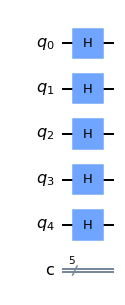

In [4]:
n = len(state)
circ = QuantumCircuit(n,n)
for iz in range(n):
    circ.h(iz)
circ.draw('mpl')

### Diffuser circuit 

In [5]:
def diffuser(n):
    qc = QuantumCircuit(n)
    
    for iz in range(n):
        qc.h(iz)
        qc.x(iz)
    
    qc.h(n-1)
    qc.mcx(list(range(n-1)), n-1)
    qc.h(n-1)   
    
    for iz in range(n):
        qc.x(iz)
        qc.h(iz)
        
    return qc

In [6]:
def grover_operator(state, n):
    
    qc = oracle(state) + diffuser(n)
    
    return qc

<ipython-input-6-140e348550cf>:3: DeprecationWarning: The QuantumCircuit.__add__() method is being deprecated.Use the compose() method which is more flexible w.r.t circuit register compatibility.
  qc = oracle(state) + diffuser(n)
c:\users\payal\appdata\local\programs\python\python38\lib\site-packages\qiskit\circuit\quantumcircuit.py:933: DeprecationWarning: The QuantumCircuit.combine() method is being deprecated. Use the compose() method which is more flexible w.r.t circuit register compatibility.
  return self.combine(rhs)


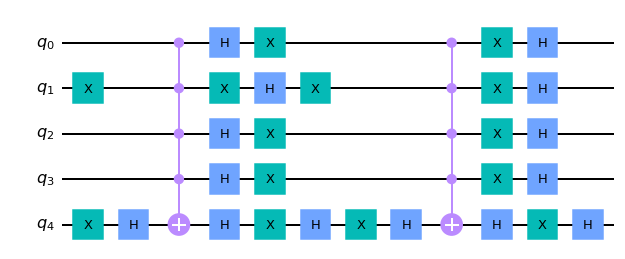

In [7]:
ck = grover_operator(state, n)
ck.draw('mpl')

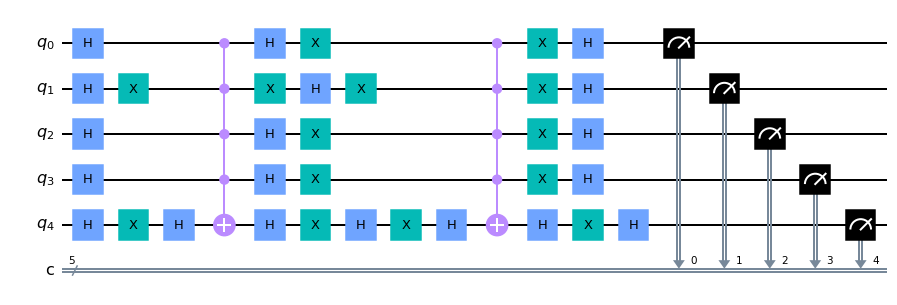

In [8]:
qc = circ.compose(grover_operator(state,n))
for iz in range(n):
    qc.measure(iz,iz)
qc.draw('mpl')

In [9]:
job = execute(qc, backend=Aer.get_backend('qasm_simulator'), shots=1024)
counts = job.result().get_counts(qc)

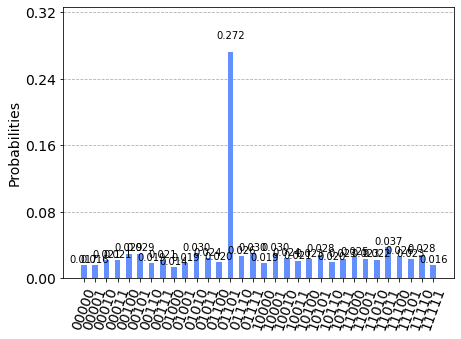

In [10]:
plot_histogram(counts)

In [11]:
def grover_search(state, n):
    
    circ = QuantumCircuit(n,n)
    for iz in range(n):
        circ.h(iz)
    
    grover_op = grover_operator(state, n)
    
    qc = circ.compose(grover_op)
    for iz in range(n):
        qc.measure(iz,iz)
        
    job = execute(qc, backend=Aer.get_backend('qasm_simulator'), shots=1024)
    counts = job.result().get_counts(qc)
    
    return plot_histogram(counts)

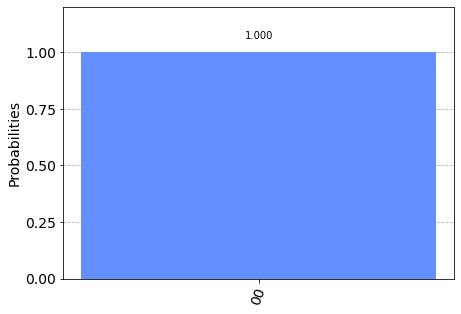

In [12]:
grover_search('00', 2)

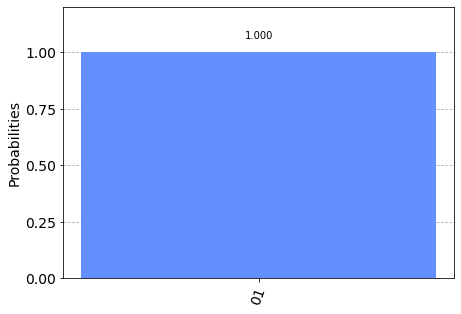

In [13]:
grover_search('01', 2)

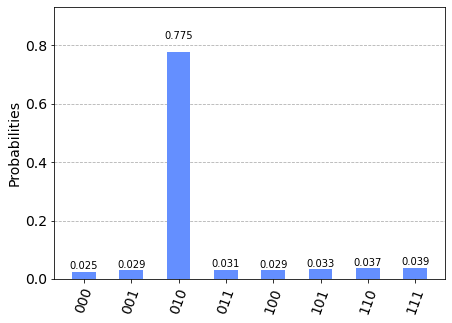

In [14]:
grover_search('010', 3)

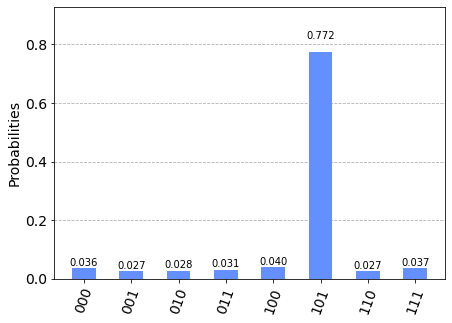

In [15]:
grover_search('101', 3)

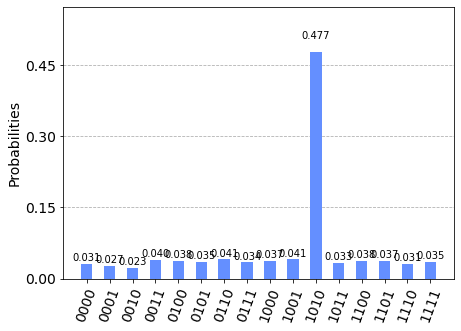

In [16]:
grover_search('1010', 4)

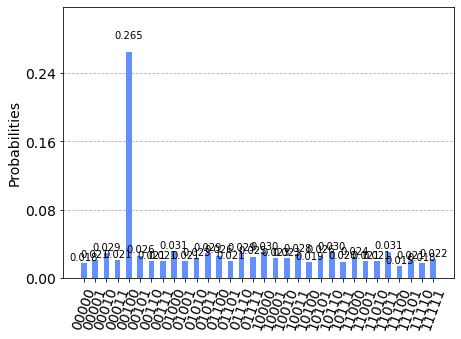

In [17]:
grover_search('00100', 5)